<a href="https://colab.research.google.com/github/youngdie07/sciml/blob/claude%2Fsolve-exam-questions-01KCUdzPvyTCnKLzWqdetDXq/Q1_1_Finite_Difference_Wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1.1 Finite Difference for Wave Equation

## Problem Statement

Solve the 1D acoustic wave equation:

$$\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}, \quad x \in [0, L], \quad t \in [0, T]$$

**Parameters:**
- Spatial domain: $x \in [0, 1]$ (i.e., $L = 1$)
- Time domain: $t \in [0, 2]$ (i.e., $T = 2$)
- Wave speed: $c = 1.0$

**Initial Conditions:**
$$u(x, 0) = \sin(\pi x) + 0.5\sin(3\pi x)$$
$$\frac{\partial u}{\partial t}(x, 0) = 0$$

**Boundary Conditions:**
$$u(0, t) = 0$$
$$u(L, t) = 0$$

We implement a second-order accurate finite difference scheme in both space and time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
np.random.seed(42)

## Finite Difference Scheme

We use the central difference approximation:

**Time discretization (second-order):**
$$\frac{\partial^2 u}{\partial t^2}\bigg|_{i,n} \approx \frac{u_i^{n+1} - 2u_i^n + u_i^{n-1}}{\Delta t^2}$$

**Space discretization (second-order):**
$$\frac{\partial^2 u}{\partial x^2}\bigg|_{i,n} \approx \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}$$

This gives the explicit scheme:
$$u_i^{n+1} = 2u_i^n - u_i^{n-1} + r^2(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$

where $r = c\frac{\Delta t}{\Delta x}$ is the **Courant number**.

**CFL Stability Condition:** For stability, we need $r \leq 1$.

In [2]:
# Parameters
L = 1.0          # Spatial domain length
T = 2.0          # Time domain
c = 1.0          # Wave speed

# Discretization
Nx = 100         # Number of spatial points
dx = L / (Nx - 1)

# CFL condition: r = c*dt/dx <= 1 for stability
# Let's choose r = 0.9 for stability
r = 0.9
dt = r * dx / c
Nt = int(T / dt) + 1
dt = T / (Nt - 1)  # Adjust dt to match exactly T

# Recalculate r with adjusted dt
r = c * dt / dx

print(f"Discretization parameters:")
print(f"  Spatial points (Nx): {Nx}")
print(f"  Time steps (Nt): {Nt}")
print(f"  dx = {dx:.6f}")
print(f"  dt = {dt:.6f}")
print(f"  Courant number r = c*dt/dx = {r:.4f}")
print(f"  CFL condition satisfied: {r <= 1.0}")

Discretization parameters:
  Spatial points (Nx): 100
  Time steps (Nt): 220
  dx = 0.010101
  dt = 0.009132
  Courant number r = c*dt/dx = 0.9041
  CFL condition satisfied: True


In [3]:
# Create spatial and temporal grids
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)

# Initialize solution array
u = np.zeros((Nt, Nx))

# Initial condition: u(x, 0) = sin(πx) + 0.5*sin(3πx)
u[0, :] = np.sin(np.pi * x) + 0.5 * np.sin(3 * np.pi * x)

# Initial velocity condition: ∂u/∂t(x, 0) = 0
# For the first time step, we use:
# u^1 = u^0 + dt * u_t(0) + (dt^2/2) * u_tt(0)
# Since u_t(0) = 0 and u_tt = c^2 * u_xx, we have:
# u^1 = u^0 + (r^2/2) * (u_{i+1}^0 - 2u_i^0 + u_{i-1}^0)

u[1, 1:-1] = u[0, 1:-1] + 0.5 * r**2 * (u[0, 2:] - 2*u[0, 1:-1] + u[0, :-2])

# Boundary conditions: u(0,t) = 0, u(L,t) = 0
u[:, 0] = 0.0
u[:, -1] = 0.0

In [4]:
# Time-stepping loop
for n in range(1, Nt-1):
    # Interior points using the explicit scheme
    u[n+1, 1:-1] = (2*u[n, 1:-1] - u[n-1, 1:-1] +
                    r**2 * (u[n, 2:] - 2*u[n, 1:-1] + u[n, :-2]))

    # Boundary conditions (already set to 0)
    u[n+1, 0] = 0.0
    u[n+1, -1] = 0.0

print("Time integration completed!")

Time integration completed!


## Visualization: Space-Time Contour Plot

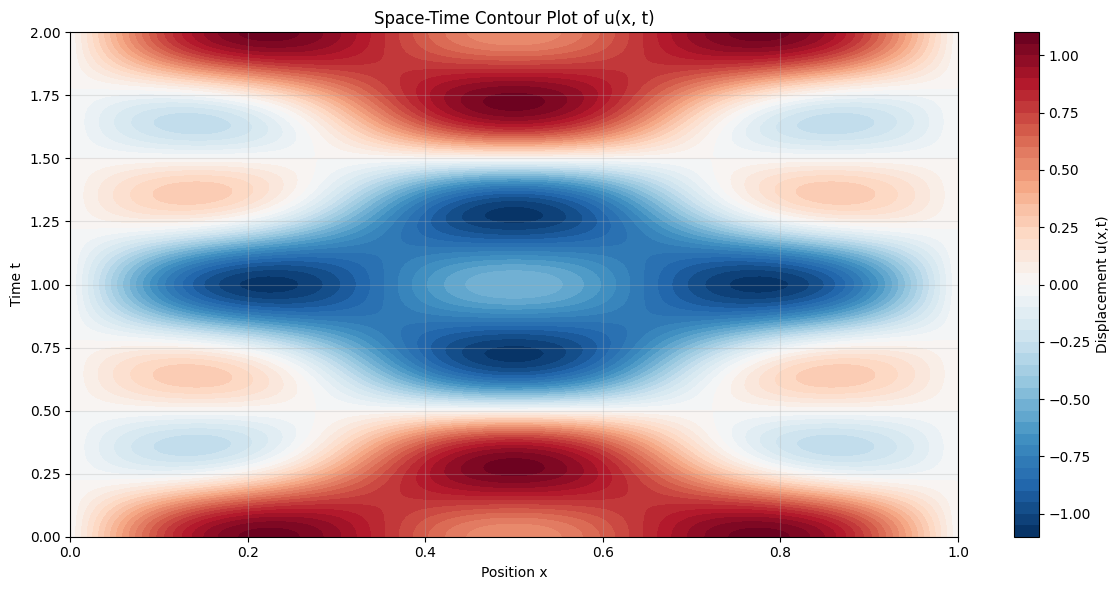

In [5]:
# Create space-time contour plot
X, T_grid = np.meshgrid(x, t)

plt.figure(figsize=(12, 6))
contour = plt.contourf(X, T_grid, u, levels=50, cmap='RdBu_r')
plt.colorbar(contour, label='Displacement u(x,t)')
plt.xlabel('Position x')
plt.ylabel('Time t')
plt.title('Space-Time Contour Plot of u(x, t)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('Q1_1_spacetime_contour.png', dpi=300, bbox_inches='tight')
plt.show()

## Solution Snapshots at Specific Times

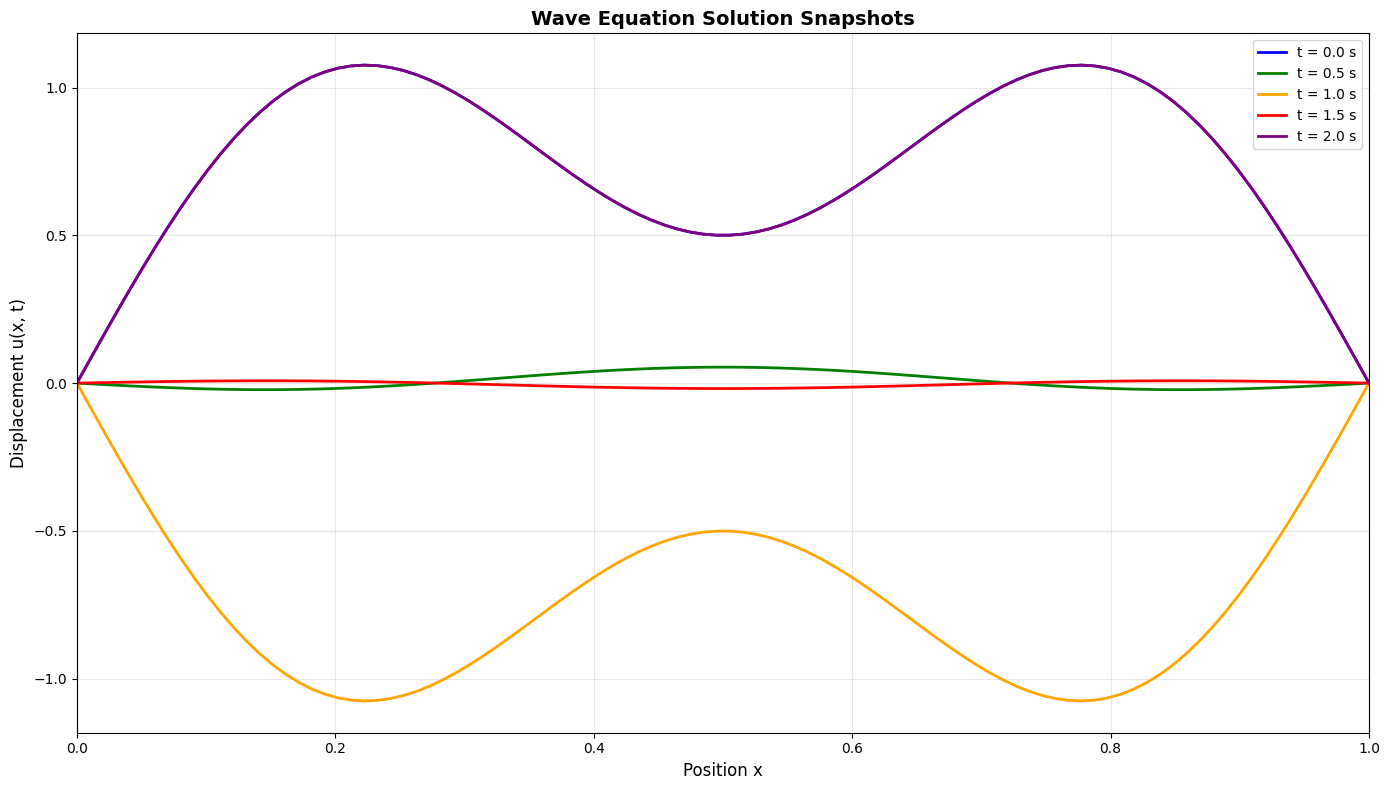

In [6]:
# Solution snapshots at t = 0, 0.5, 1.0, 1.5, 2.0 s
snapshot_times = [0, 0.5, 1.0, 1.5, 2.0]
snapshot_indices = [int(t_snap / dt) for t_snap in snapshot_times]

plt.figure(figsize=(14, 8))
colors = ['blue', 'green', 'orange', 'red', 'purple']

for i, (t_idx, t_val) in enumerate(zip(snapshot_indices, snapshot_times)):
    if t_idx < Nt:
        plt.plot(x, u[t_idx, :], label=f't = {t_val:.1f} s',
                color=colors[i], linewidth=2)

plt.xlabel('Position x', fontsize=12)
plt.ylabel('Displacement u(x, t)', fontsize=12)
plt.title('Wave Equation Solution Snapshots', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim([0, L])
plt.tight_layout()
plt.savefig('Q1_1_snapshots.png', dpi=300, bbox_inches='tight')
plt.show()

## Time-Step Stability Check

We check for any numerical instabilities by monitoring the maximum absolute value of the solution.

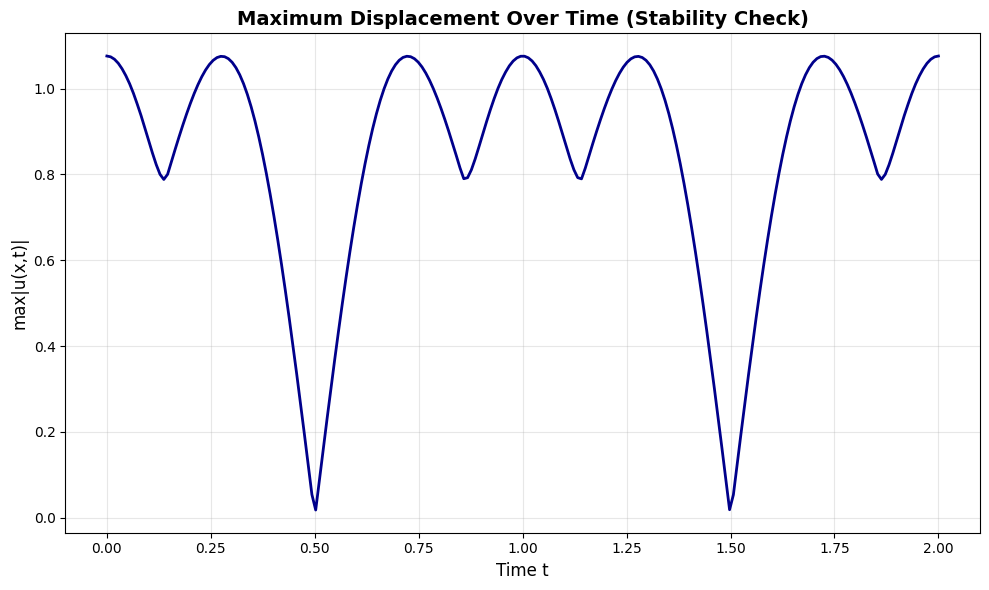

Maximum displacement over all time steps: 1.075800
Solution remains bounded: True


In [7]:
# Check stability: monitor max absolute value over time
max_u = np.max(np.abs(u), axis=1)

plt.figure(figsize=(10, 6))
plt.plot(t, max_u, linewidth=2, color='darkblue')
plt.xlabel('Time t', fontsize=12)
plt.ylabel('max|u(x,t)|', fontsize=12)
plt.title('Maximum Displacement Over Time (Stability Check)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('Q1_1_stability.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Maximum displacement over all time steps: {np.max(max_u):.6f}")
print(f"Solution remains bounded: {np.max(max_u) < 10}")

Because the Courant number r = c·Δt/Δx is less than 1 and the maximum absolute solution max|u(x,t)| remains bounded (does not grow over time), the explicit time-stepping scheme is stable for this simulation.